In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Simulation d'un réseau de neurones avec BRIAN (réseau CUBA)

Nous implémentons également un réseau de neurones CUBA.

https://brian.readthedocs.org/en/latest/tutorial2_connections.html#tutorial-2-connections

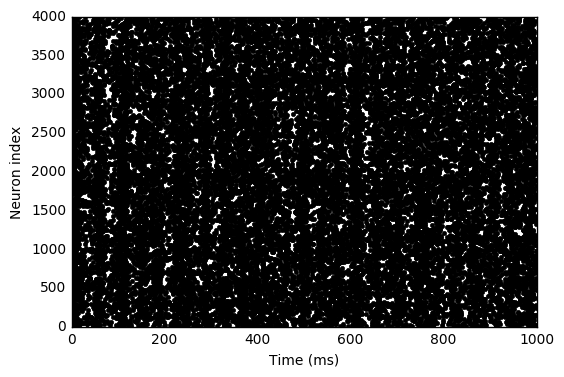

In [2]:
from brian2 import *

taum = 20*ms
taue = 5*ms
taui = 10*ms
Vt = -50*mV
Vr = -60*mV
El = -49*mV

eqs = '''
dv/dt  = (ge+gi-(v-El))/taum : volt (unless refractory)
dge/dt = -ge/taue : volt
dgi/dt = -gi/taui : volt
'''

P = NeuronGroup(4000, eqs, threshold='v>Vt', reset='v = Vr', refractory=5*ms,
                method='linear')
P.v = 'Vr + rand() * (Vt - Vr)'
P.ge = 0*mV
P.gi = 0*mV

we = (60*0.27/10)*mV # excitatory synaptic weight (voltage)
wi = (-20*4.5/10)*mV # inhibitory synaptic weight
Ce = Synapses(P, P, on_pre='ge += we')
Ci = Synapses(P, P, on_pre='gi += wi')
Ce.connect('i<3200', p=0.02)
Ci.connect('i>=3200', p=0.02)

s_mon = SpikeMonitor(P)

run(1 * second)

plot(s_mon.t/ms, s_mon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
show()

In [3]:
from brian2tools import plot_raster
help(plot_raster)

Help on function plot_raster in module brian2tools.plotting.data:

plot_raster(spike_indices, spike_times, time_unit=msecond, axes=None, **kwds)
    Plot a "raster plot", a plot of neuron indices over spike times. The default
    marker used for plotting is ``'.'``, it can be overriden with the ``marker``
    keyword argument.
    
    Parameters
    ----------
    spike_indices : `~numpy.ndarray`
        The indices of spiking neurons, corresponding to the times given in
        ``spike_times``.
    spike_times : `~brian2.units.fundamentalunits.Quantity`
        A sequence of spike times.
    time_unit : `~brian2.units.fundamentalunits.Unit`, optional
        The unit to use for the time axis. Defaults to ``ms``, but longer
        simulations could use ``second``, for example.
    axes : `~matplotlib.axes.Axes`, optional
        The `~matplotlib.axes.Axes` instance used for plotting. Defaults to
        ``None`` which means that a new `~matplotlib.axes.Axes` will be
        created f

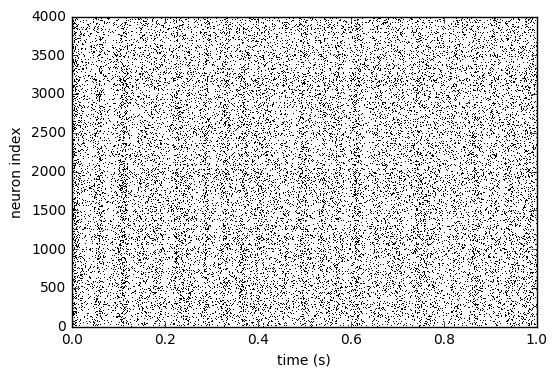

In [4]:
plot_raster(s_mon.i, s_mon.t, time_unit=second, marker=',', color='k');